In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
from wordcloud import WordCloud
# 텍스트 마이닝 
warnings.filterwarnings('ignore')

한글 깨짐현상 수정 및 seaborn 테마 설정 (MAC 기준)

In [3]:
# 나눔고딕 설정 
plt.rc('font', family='AppleGothic')  # Mac
# plt.rc('font', family='NanumGothic') # window

# sns.set_style('whitegrid')

# Set the style for visualizations
plt.style.use('fivethirtyeight')
sns.set_palette("Set2")

In [ ]:
review_df = pd.read_csv('./data/netflix_reviews.csv')

데이터 결측치 유무 & 데이터 확인

In [8]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133910 entries, 0 to 133909
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              133910 non-null  object
 1   userName              133908 non-null  object
 2   content               133905 non-null  object
 3   score                 133910 non-null  int64 
 4   thumbsUpCount         133910 non-null  int64 
 5   reviewCreatedVersion  111661 non-null  object
 6   at                    133910 non-null  object
 7   appVersion            111661 non-null  object
dtypes: int64(2), object(6)
memory usage: 8.2+ MB


In [9]:
review_df.isna().sum()

reviewId                    0
userName                    2
content                     5
score                       0
thumbsUpCount               0
reviewCreatedVersion    22249
at                          0
appVersion              22249
dtype: int64

In [10]:
# review columns (안드로이드 데이터)
# 리뷰 id ,유저 이름, 내용, 점수, 긍정적인, 리뷰 생성버전, 시간, 앱 버전 
review_df.columns

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')

# EDA

## 1. 넷플릭스 리뷰 데이터 분석 

In [11]:
review_df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,9d05a190-81fb-44a1-88f8-c6b176ed2068,BEE G,"not happy. since update, all my downloads have...",1,0,9.10.0 build 10 62444,2025-04-14 13:37:52,9.10.0 build 10 62444
1,e217ddfd-551b-4204-8c2c-4784852678ff,Francis Koome,it is hard to login i don't like absolutely,1,0,9.10.0 build 10 62444,2025-04-14 13:32:47,9.10.0 build 10 62444
2,c355a3fe-2369-427a-8a32-4d5c6747f36f,Dinesh Bala,i not able to creat a new account how can i cr...,1,0,9.10.0 build 10 62444,2025-04-14 13:06:45,9.10.0 build 10 62444
3,bee625cc-919a-4983-b825-7c568ab6c87e,Patrick Nyirongo,By faith am second to none,2,0,NaN,2025-04-14 13:03:04,NaN
4,e343a693-fdd6-4824-a000-87cbb9146d4a,Eums ika,mntap,5,0,NaN,2025-04-14 13:01:10,NaN


별점 3점이하

In [12]:
review_df[review_df['score'] < 4]

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,9d05a190-81fb-44a1-88f8-c6b176ed2068,BEE G,"not happy. since update, all my downloads have...",1,0,9.10.0 build 10 62444,2025-04-14 13:37:52,9.10.0 build 10 62444
1,e217ddfd-551b-4204-8c2c-4784852678ff,Francis Koome,it is hard to login i don't like absolutely,1,0,9.10.0 build 10 62444,2025-04-14 13:32:47,9.10.0 build 10 62444
2,c355a3fe-2369-427a-8a32-4d5c6747f36f,Dinesh Bala,i not able to creat a new account how can i cr...,1,0,9.10.0 build 10 62444,2025-04-14 13:06:45,9.10.0 build 10 62444
3,bee625cc-919a-4983-b825-7c568ab6c87e,Patrick Nyirongo,By faith am second to none,2,0,NaN,2025-04-14 13:03:04,NaN
5,7da20a67-f923-4135-8cc9-47c56fc6c672,Belinda Luna,I have two TVs I'm trying to set up my Netflix...,1,0,9.10.0 build 10 62444,2025-04-14 12:58:24,9.10.0 build 10 62444
...,...,...,...,...,...,...,...,...
133901,5f68b545-1079-4a57-9024-fc6e27d7db96,AD Basson,The. Best App. Ever,2,0,8.107.0 build 9 50640,2024-04-01 10:21:15,8.107.0 build 9 50640
133902,9996579a-cf67-40a6-94eb-9ccd63c7d46a,dady mon mari,How can I delete one of the users? Please. Hel...,3,0,8.104.0 build 5 50619,2024-03-01 04:54:36,8.104.0 build 5 50619
133904,cbb04dd9-1a1d-46df-80a4-8ae987fe5d85,Ciaran Worthington,Everytime I watch a show it goes so dark so I ...,1,0,7.48.0 build 10 34747,2020-08-22 14:58:10,7.48.0 build 10 34747
133907,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN


별점 4점 이상

In [13]:
review_df[review_df['score'] >= 4].head(10)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
4,e343a693-fdd6-4824-a000-87cbb9146d4a,Eums ika,mntap,5,0,NaN,2025-04-14 13:01:10,NaN
6,8243ee6c-5162-4bbf-9b7f-422fea34df5b,Vaibhav Davange,zero ad best experience watch every show,5,0,NaN,2025-04-14 12:48:49,NaN
10,abc66034-6f14-4ef4-b01b-94fed912e659,Jannelle Manakaue,some of the movies/shows are gone but everythi...,4,0,9.10.0 build 10 62444,2025-04-14 11:43:30,9.10.0 build 10 62444
13,480d47e9-e430-4fb9-857d-c48a13f79b79,Abubaka R,craziest,5,0,NaN,2025-04-14 10:33:03,NaN
15,536c0e1e-7bd3-4456-bd34-8055afac7edb,Eutacious Siamunyanga,It's the best,5,0,8.141.1 build 13 51230,2025-04-14 09:56:11,8.141.1 build 13 51230
16,ee5d842c-2f81-477f-9d3d-f8c508170bd4,Abrar Memon,i like this,5,0,8.87.0 build 2 50509,2025-04-14 09:49:05,8.87.0 build 2 50509
17,5a06dae0-6517-4956-8f30-856341531652,Kaleb Brouillette,"The app on here is fine, but Love Death and Ro...",4,1,8.99.1 build 8 50590,2025-04-14 08:52:56,8.99.1 build 8 50590
25,322796c0-7c07-404f-a4ef-7f2b9186d452,Usam Warraich,Nice Movies App❤️,5,0,NaN,2025-04-14 07:53:46,NaN
30,54bb6df1-8e3f-4bd8-a74c-b9a6405bb65e,A Google user,seemed to be easy...will see how it works!,4,0,8.114.0 build 19 50680,2025-04-14 06:54:48,8.114.0 build 19 50680
33,078ea46b-a153-44f4-b79b-13b5da3d7808,Nitharshini Nitharshini,super,5,0,NaN,2025-04-14 06:44:05,NaN


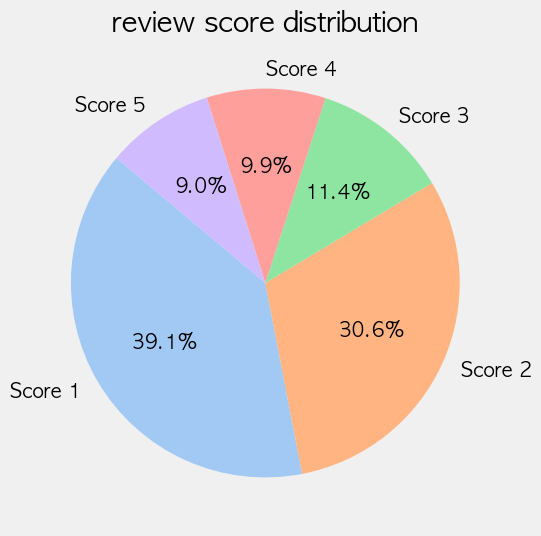

In [14]:
# 리뷰 점수 분포 파이 차트 
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(10, 6))
labels = ['Score 1', 'Score 2', 'Score 3', 'Score 4', 'Score 5']
plt.pie(review_df['score'].value_counts(),
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,)
plt.title('review score distribution')
plt.show()

리뷰 점수 막대 그래프 

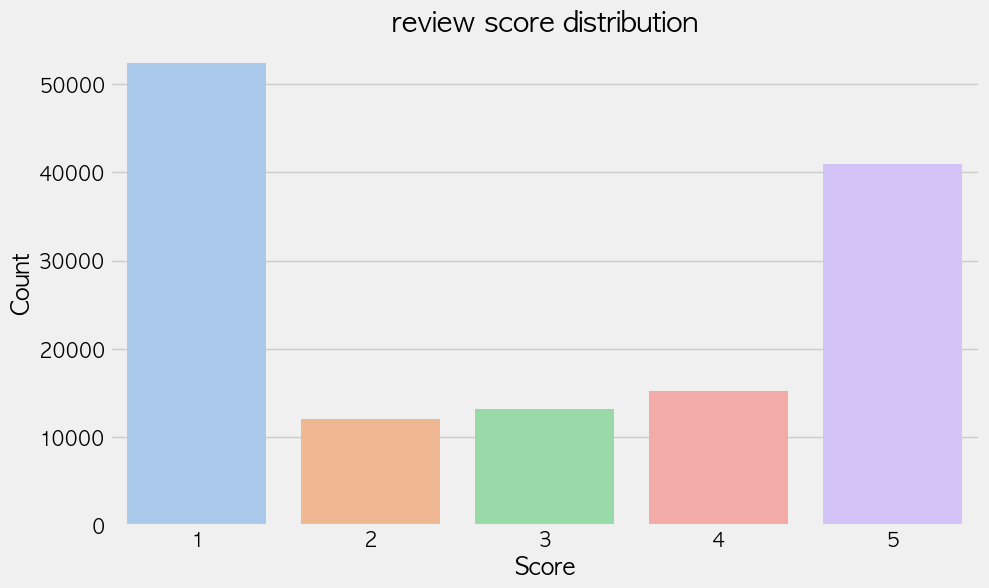

In [37]:
# 리뷰 점수 분포 바 차트
plt.figure(figsize=(10, 6)) 
sns.countplot(x='score', data=review_df, palette='pastel') 
plt.title('review score distribution')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



리뷰 키워드 찾기 https://github.com/MaartenGr/KeyBERT

In [15]:
review_df['content'].isna().sum()
review_df = review_df[review_df['content'].notna()]
review_df['content']

0         not happy. since update, all my downloads have...
1               it is hard to login i don't like absolutely
2         i not able to creat a new account how can i cr...
3                                By faith am second to none
4                                                     mntap
                                ...                        
133905    i really like it! there are so many movies and...
133906     I love Netflix. I always enjoy my time using it.
133907                 Sound quality is very slow of movies
133908    Rate is very expensive.. bcos we see netflix s...
133909    this app is awesome for english movies ,series...
Name: content, Length: 133905, dtype: object

긍정적인 사람과 부정적인 사람에 대한 데이터 분석

In [17]:
(review_df['score'].mean())

2.8521937194279525

In [18]:
unique_name = review_df.loc[review_df['userName'].duplicated(), 'userName'].unique()
# 중복된 userName 수 출력
print(len(unique_name))
# 중복된 userName을 가진 모든 행 출력
duplicate_revier_df = review_df[review_df['userName'].isin(unique_name)]
duplicate_revier_df

2930


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
29,10d36442-8053-40b0-975a-0ec1a4af87b9,Rashid Khan,keep improvisation and update for user friendly,1,0,9.10.0 build 10 62444,2025-04-14 06:54:50,9.10.0 build 10 62444
30,54bb6df1-8e3f-4bd8-a74c-b9a6405bb65e,A Google user,seemed to be easy...will see how it works!,4,0,8.114.0 build 19 50680,2025-04-14 06:54:48,8.114.0 build 19 50680
41,81bcfaff-24d7-4eb0-8ca2-5f4ba15d5fa6,Cynthia,I use to like Netflix until now. The problem I...,1,0,9.10.0 build 10 62444,2025-04-14 05:08:46,9.10.0 build 10 62444
44,2776ce47-ada5-417b-9aed-407e5a609953,Aditya Raj,not open app,1,0,9.10.0 build 10 62444,2025-04-14 04:54:08,9.10.0 build 10 62444
73,1f0fb1d9-59ca-4775-a68b-7421ccd43c1a,Santosh Kumar,not able to install in my phone,1,0,8.132.0 build 8 50836,2025-04-13 12:32:36,8.132.0 build 8 50836
...,...,...,...,...,...,...,...,...
133877,4956b0d3-ecca-4ca5-8775-777bd7f6460e,A Google user,"""well when you don't have a television.. you c...",5,0,6.13.0 build 29940,2018-10-21 22:59:42,6.13.0 build 29940
133889,f25e4d9d-23a1-46d2-9da4-9fc12cd1a657,A Google user,Won't stay connected to Chromecast,1,0,6.14.0 build 30314,2018-10-29 08:27:09,6.14.0 build 30314
133895,ccb3557a-85c8-473e-88bb-e445f80b24f8,A Google user,I reacharged for 199 rs and it still says to u...,1,0,7.37.1 build 23 34630,2019-12-07 15:18:16,7.37.1 build 23 34630
133905,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN


긍정 부정적인 값 찾기 

In [23]:
negative_review_df = review_df[review_df['score'] < 4]
positive_review_df = review_df[review_df['score'] >= 4]

print(f'{len(negative_review_df)}개의 리뷰가 부정적입니다.')
print(f'{len(positive_review_df)}개의 리뷰가 긍정적입니다.')

77723개의 리뷰가 부정적입니다.
56182개의 리뷰가 긍정적입니다.


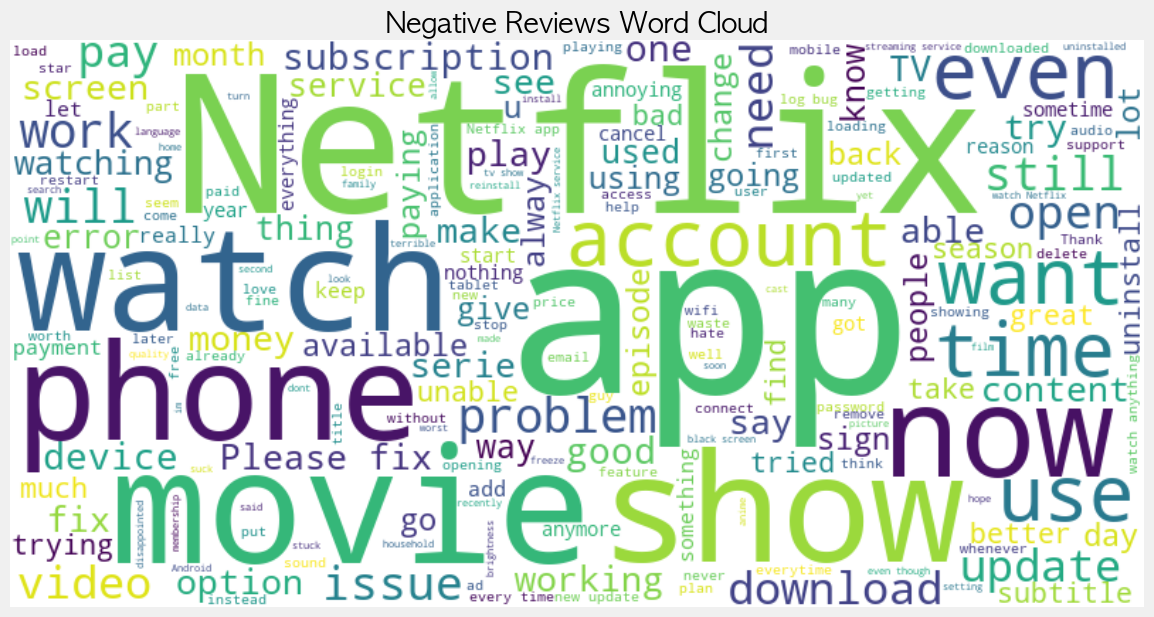

In [24]:
#  평점이 낮은 워드 클라우드 생성 
text = ' '.join(negative_review_df['content'])
# 워드 클라우드 생성 
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    colormap='viridis'
).generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud', fontsize=20)
plt.show()


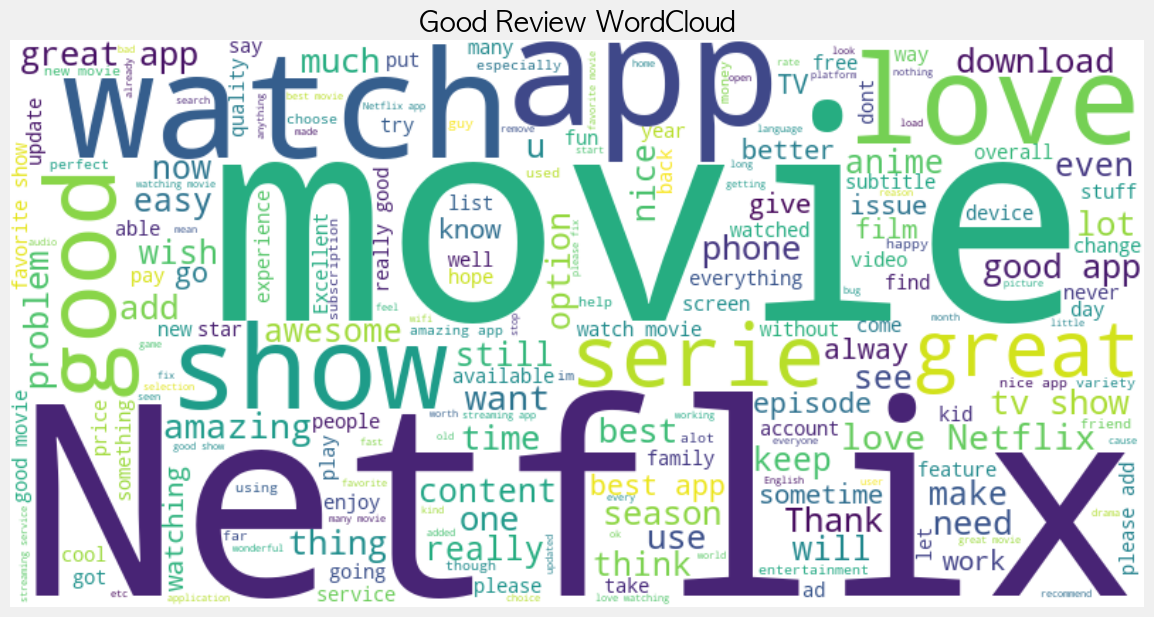

In [25]:
#  평점이 낮은 워드 클라우드 생성 
text = ' '.join(positive_review_df['content'])
# 워드 클라우드 생성 
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    colormap='viridis'
).generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Good Review WordCloud', fontsize=20)
plt.show()

부정적인 사람들의 앱 버전 확인 

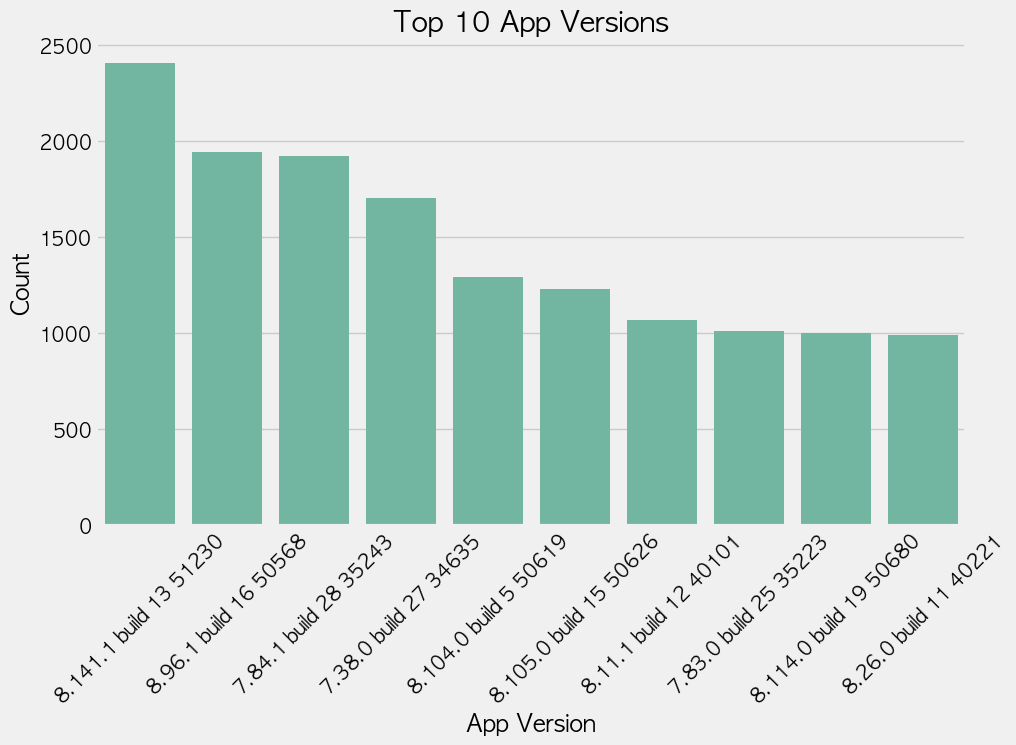

In [28]:
plt.figure(figsize=(10, 6))
top_app_version = review_df['appVersion'].value_counts().head(10)
sns.barplot(x=top_app_version.index, y= top_app_version.values)
plt.xticks(rotation=45)
plt.title('Top 10 App Versions')
plt.xlabel('App Version')
plt.ylabel('Count')
plt.show()

부정적인 사람과 긍정적인 사람의 리뷰 글자 수 확인

<Axes: xlabel='cotent_length', ylabel='Count'>

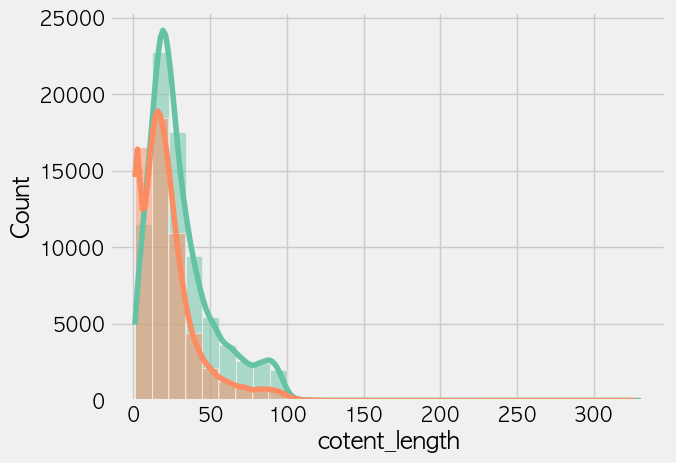

In [31]:
review_df['cotent_length'] = review_df['content'].apply(lambda x: len(x.split()))
sns.histplot(review_df[review_df['score'] < 4]['cotent_length'], bins=30, kde=True)
sns.histplot(review_df[review_df['score'] >= 4]['cotent_length'], bins=30, kde=True)